In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_excel("2021.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2021,17086,119,40,3555
1,2021,17590,76,36,3527
2,2021,17035,61,42,3566
3,2021,17727,386,38,3512
4,2021,18042,250,16,3524
...,...,...,...,...,...
1772,2021,17679,274,22,3528
1773,2021,17846,370,28,3533
1774,2021,17934,358,22,3506
1775,2021,17939,64,19,3519


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1777, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1777 non-null   int64
 1   Maximum length (m))  1777 non-null   int64
 2   Recession(m),        1777 non-null   int64
 3   Rate/yr(m)           1777 non-null   int64
 4   Snout altitude (m)   1777 non-null   int64
dtypes: int64(5)
memory usage: 69.5 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  71
Number  of instances of models:  1777


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2021,17086,119,40,3555
1,2021,17590,76,36,3527
2,2021,17035,61,42,3566
3,2021,17727,386,38,3512
4,2021,18042,250,16,3524


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0063,-0.0082,-0.0021
"Recession(m),",NaN,-0.0063,1.0000,0.0041,0.0018
Rate/yr(m),NaN,-0.0082,0.0041,1.0000,0.0209
Snout altitude (m),NaN,-0.0021,0.0018,0.0209,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)    -0.0021
Recession(m),         -0.0063
Rate/yr(m)            -0.0082
Year                      NaN
Name: Maximum length (m)), dtype: float64

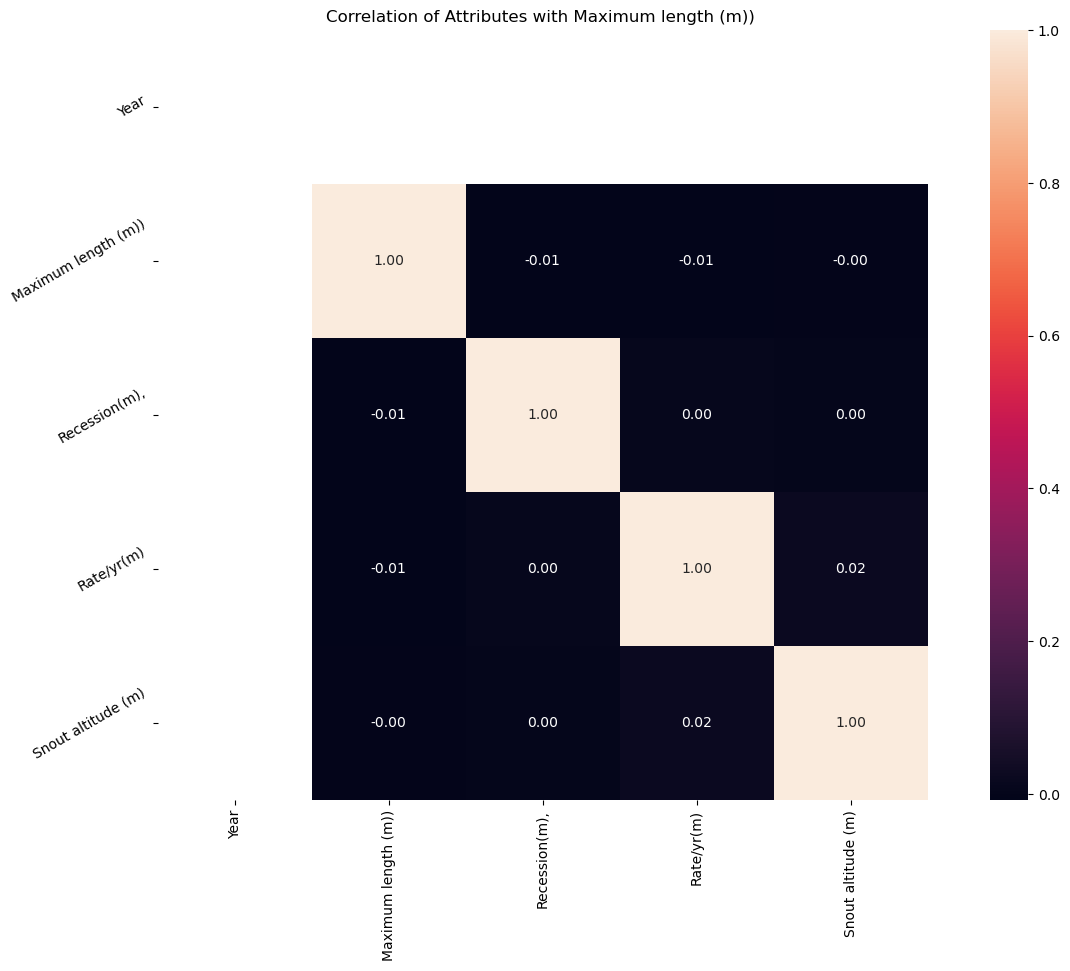

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,777.0000","1,777.0000","1,777.0000","1,777.0000","1,777.0000"
mean,"2,021.0000","17,539.2786",220.0535,27.4412,"3,531.8289"
std,0.0000,294.4579,127.8823,8.6340,20.2894
min,"2,021.0000","17,035.0000",0.0000,13.0000,"3,497.0000"
25%,"2,021.0000","17,283.0000",107.0000,20.0000,"3,514.0000"
50%,"2,021.0000","17,551.0000",222.0000,27.0000,"3,531.0000"
75%,"2,021.0000","17,791.0000",329.0000,35.0000,"3,550.0000"
max,"2,021.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2021   1.0000
Name: Year, dtype: float64

237   0.0062
402   0.0062
176   0.0051
244   0.0051
308   0.0051
       ...  
434   0.0006
342   0.0006
54    0.0006
200   0.0006
55    0.0006
Name: Recession(m),, Length: 434, dtype: float64

24   0.0428
34   0.0416
39   0.0411
18   0.0405
15   0.0400
31   0.0388
20   0.0371
19   0.0371
25   0.0360
28   0.0355
14   0.0355
16   0.0343
42   0.0343
32   0.0332
27   0.0332
38   0.0326
35   0.0321
29   0.0321
23   0.0310
30   0.0310
36   0.0310
22   0.0310
40   0.0304
37   0.0298
41   0.0287
17   0.0281
33   0.0270
26   0.0259
13   0.0259
21   0.0225
Name: Rate/yr(m), dtype: float64

3521   0.0214
3539   0.0214
3516   0.0191
3526   0.0191
3550   0.0180
        ...  
3525   0.0101
3565   0.0096
3507   0.0090
3519   0.0084
3498   0.0084
Name: Snout altitude (m), Length: 71, dtype: float64



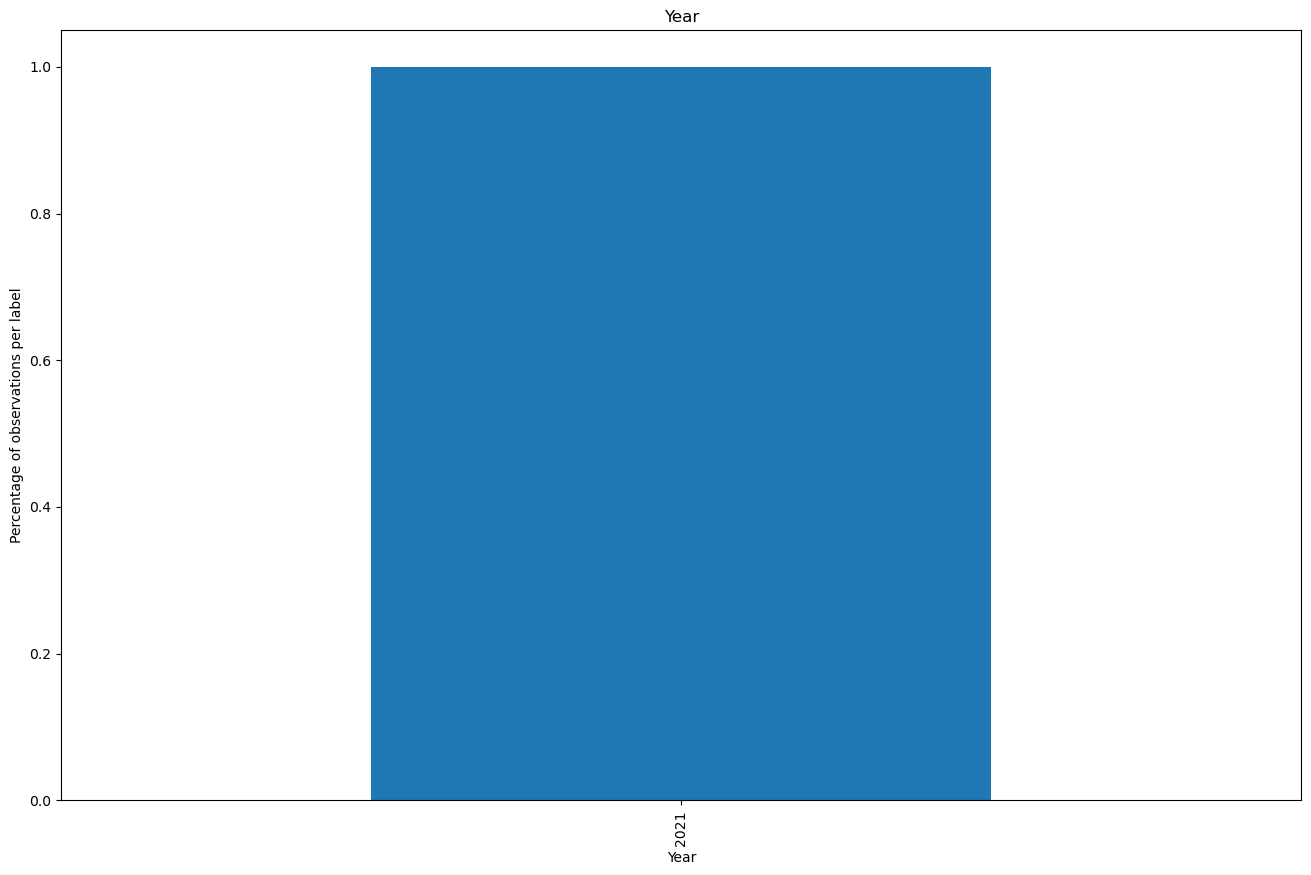

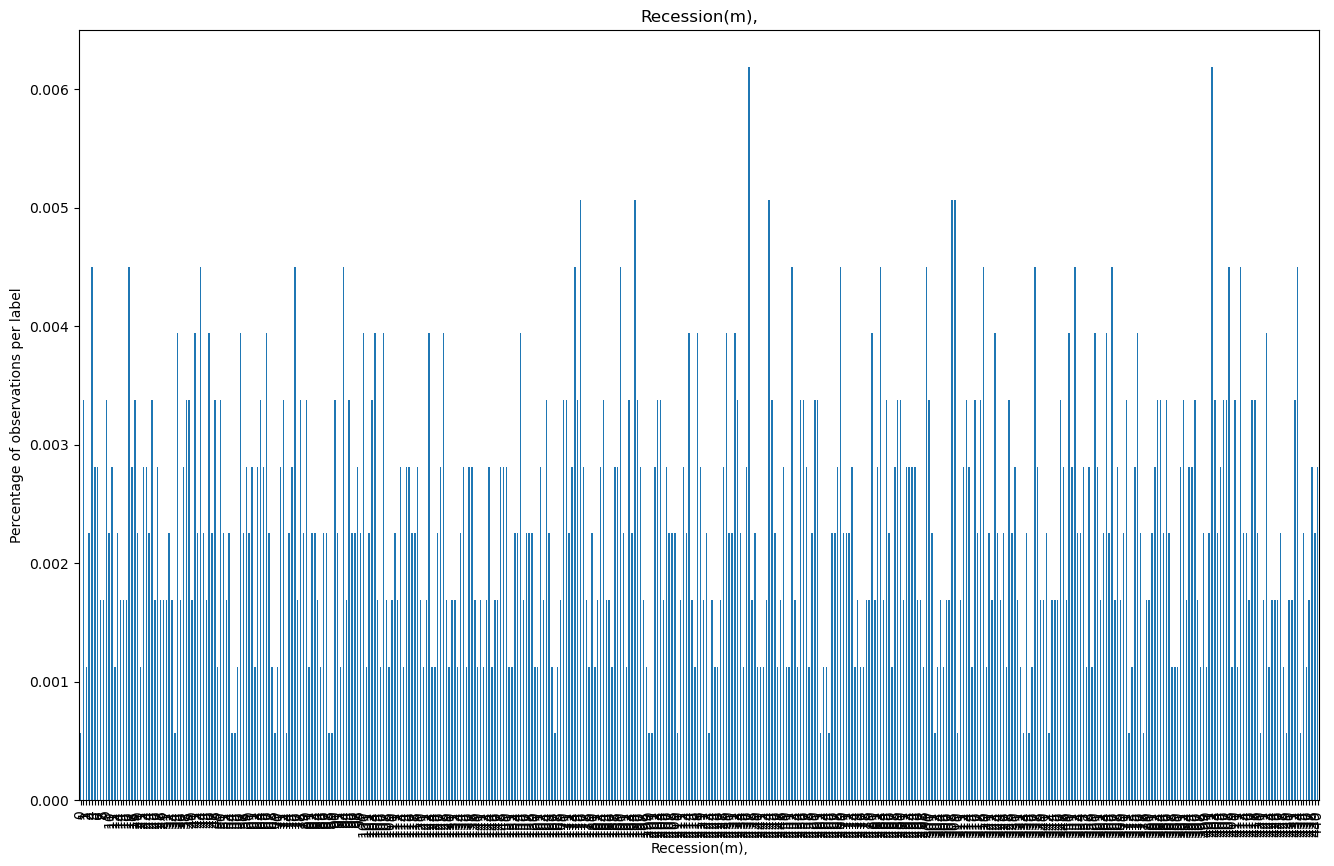

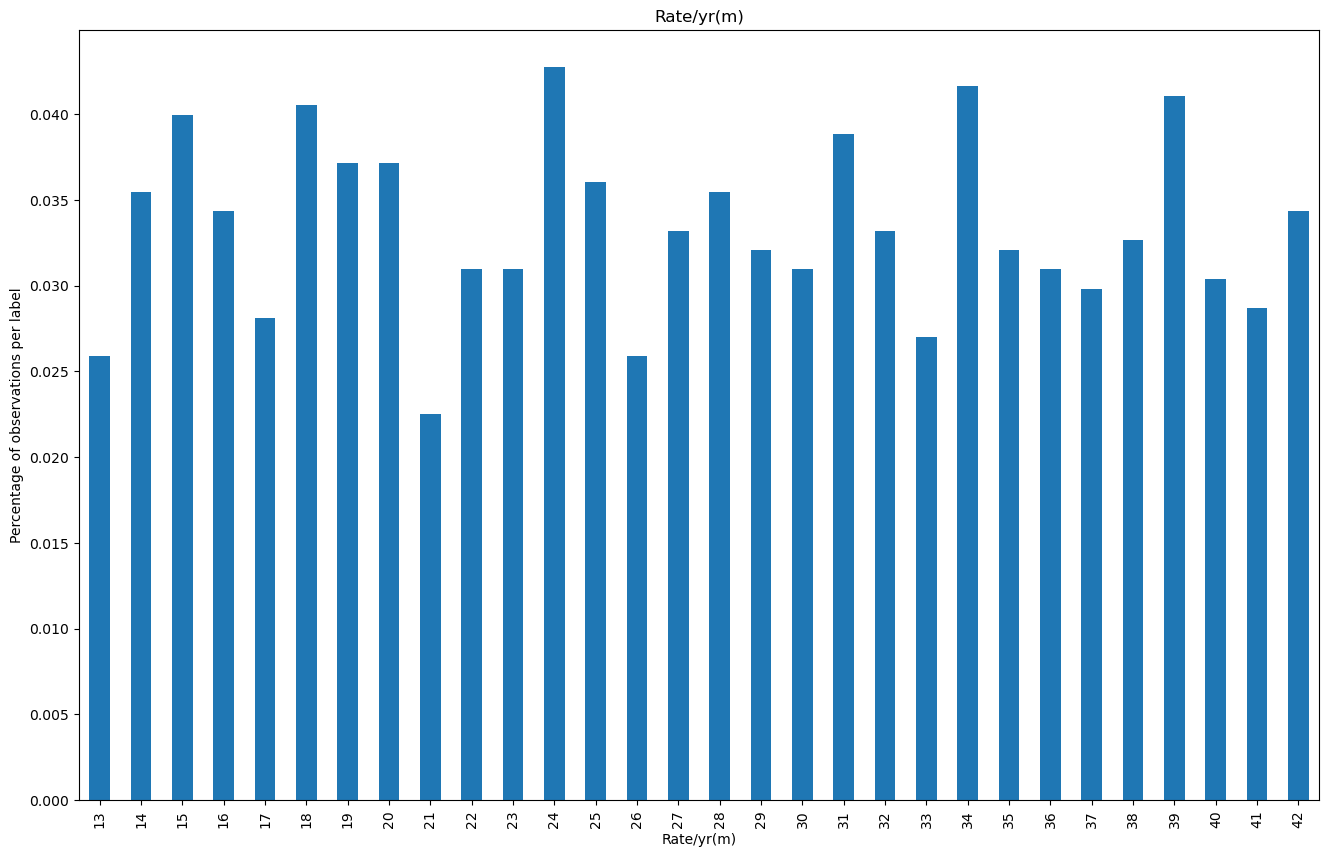

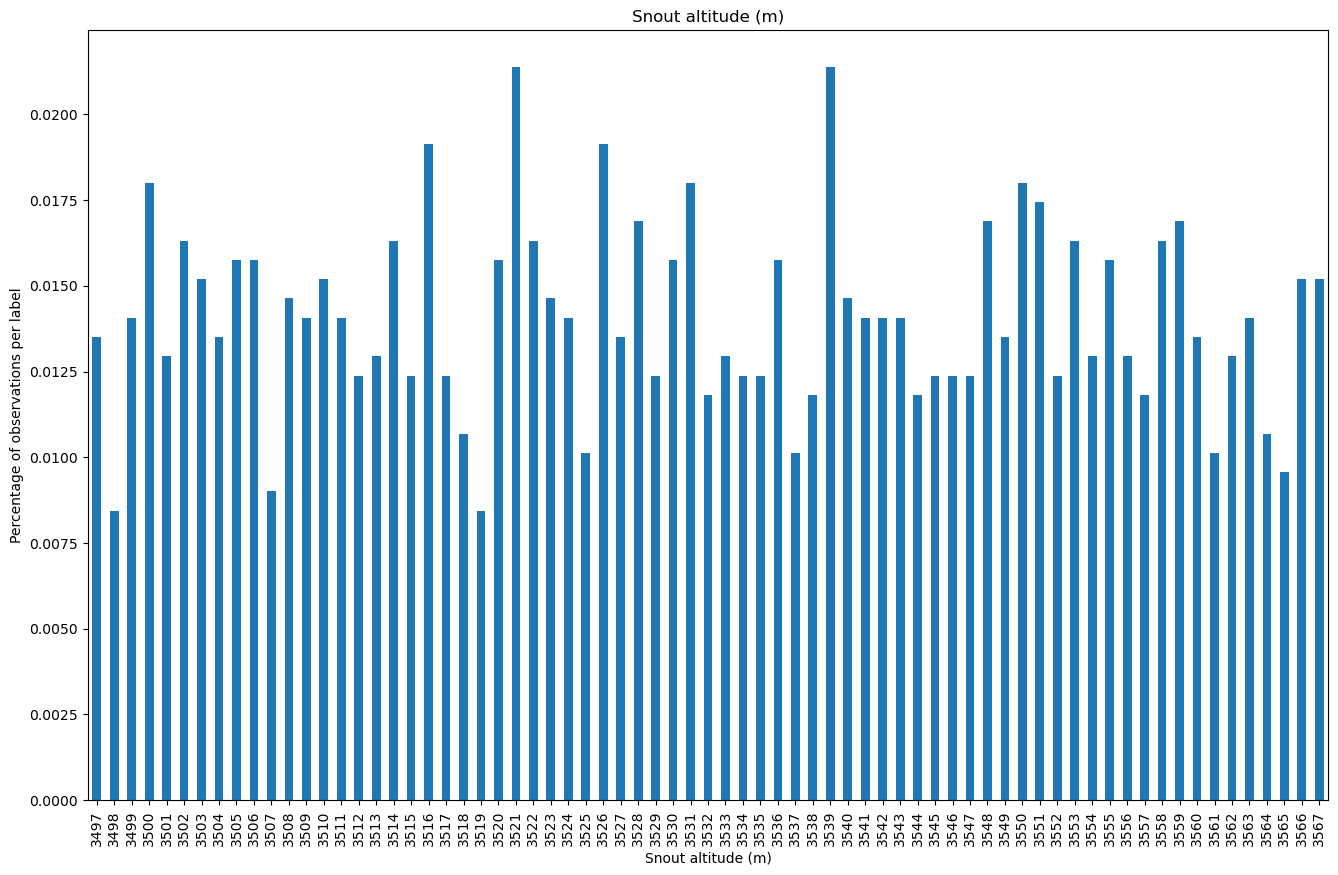

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()